## <center><code> Outlier Detection Using IQR Method</code></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Dataset/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

###  Outlier handle with IQR method

In [5]:
q1_H = df['Height'].quantile(0.25)
q2_H = df['Height'].median()
q3_H = df['Height'].quantile(0.75)

IQR = q3_H - q1_H
IQR

5.668641245615746

In [6]:
lower_fence_H = q1_H - (1.5*IQR)
upper_fence_H = q3_H + (1.5*IQR)

print(f"Lower bound for outlier detection: {lower_fence_H}")
print(f"Upper bound for outlier detection: {upper_fence_H}")

Lower bound for outlier detection: 55.00265861279534
Upper bound for outlier detection: 77.67722359525831


In [7]:
q1_W = df['Weight'].quantile(0.25)
q2_W = df['Weight'].median()
q3_W = df['Weight'].quantile(0.75)

IQR = q3_W - q1_W
IQR

51.35147356318197

In [8]:
lower_fence_W = q1_W - (1.5*IQR)
upper_fence_W = q3_W + (1.5*IQR)

print(f"Lower bound for outlier detection: {lower_fence_W}")
print(f"Upper bound for outlier detection: {upper_fence_W}")

Lower bound for outlier detection: 58.79084096072856
Upper bound for outlier detection: 264.19673521345646


In [9]:
outlier = df[((df['Height']<lower_fence_H) | (df['Height']>upper_fence_H)) | ((df['Weight']<lower_fence_W) | (df['Weight']>upper_fence_W))]
outlier

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


###  Box Plot for visual representation

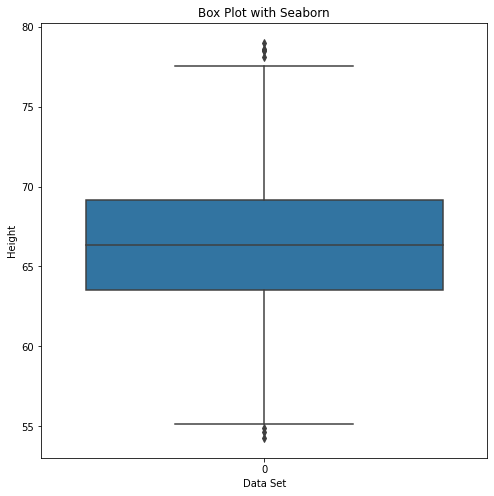

In [22]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df['Height'])
plt.title("Box Plot with Seaborn")
plt.xlabel("Data Set")
plt.ylabel("Height")
plt.show()

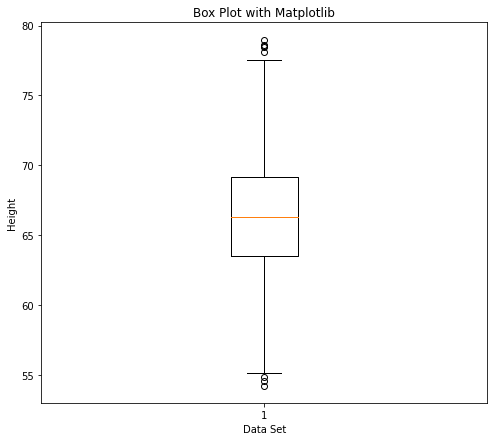

In [19]:
plt.figure(figsize=(8, 7))
plt.boxplot(df['Height'])
plt.title("Box Plot with Matplotlib")
plt.xlabel("Data Set")
plt.ylabel("Height")
plt.show()

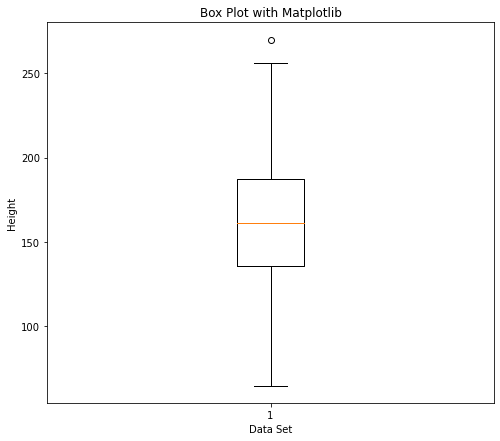

In [21]:
plt.figure(figsize=(8, 7))
plt.boxplot(df['Weight'])
plt.title("Box Plot with Matplotlib")
plt.xlabel("Data Set")
plt.ylabel("Height")
plt.show()